In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [33]:
def get_tuned_params_dict(lines):
    
    tuned_params = {}
    for hp in lines[6:]:
        if 'tuner/epochs' in hp:
            break

        hp_name, hp_choice = hp.split(':')
        hp_choice = hp_choice[1:-1]

        if hp_name in ["dropout", "learning_rate"]:
            hp_choice = float(hp_choice)
        else:
            hp_choice = int(hp_choice)

        tuned_params[hp_name] = hp_choice

    if tuned_params['num_layers'] == 2:
        tuned_params['layer_2_units'] = 0

    elif tuned_params['num_layers'] == 1:
        tuned_params['layer_1_units'] = 0
        tuned_params['layer_2_units'] = 0
    
    return tuned_params


def get_gnn_neurons_hp(cancer, strategy, gnn):
    
    neurons = {
        "layer_0_units": [],
        "layer_1_units": [],
        "layer_2_units": []
    }

    for th in ["001", "005", "01", "025", "05", "075", "09", "095", "099"]:
        
        file = f"C:/Users/colombelli/Desktop/TCC/experiments/{cancer}/{strategy}/{th}/{gnn}_tunner_best_results.txt"
        with open(file) as f:
            lines = f.readlines()
        tuned_params = get_tuned_params_dict(lines)

        neurons['layer_0_units'].append(tuned_params['layer_0_units'])
        neurons['layer_1_units'].append(tuned_params['layer_1_units'])
        neurons['layer_2_units'].append(tuned_params['layer_2_units'])

    df = pd.DataFrame(neurons, index=["0.01", "0.05", "0.1", "0.25", "0.5", "0.75", "0.9", "0.95", "0.99"])
    return df


def get_mlp_neurons_hp(cancer):
    
    file = f"C:/Users/colombelli/Desktop/TCC/experiments/{cancer}/mlp/mlp_tunner_best_results.txt"
    with open(file) as f:
        lines = f.readlines()
    tuned_params = get_tuned_params_dict(lines)
    
    neurons = {}
    neurons['layer_0_units'] = [tuned_params['layer_0_units']]
    neurons['layer_1_units'] = [tuned_params['layer_1_units']]
    neurons['layer_2_units'] = [tuned_params['layer_2_units']]

    df = pd.DataFrame(neurons, index=["0.01", "0.05", "0.1", "0.25", "0.5", "0.75", "0.9", "0.95", "0.99"])
    return df

In [41]:
df_gat_coad_cgen = get_gnn_neurons_hp("COAD", "correlation", "gat")
df_gcn_coad_cgen = get_gnn_neurons_hp("COAD", "correlation", "gcn")
df_mlp_coad = get_mlp_neurons_hp("COAD")

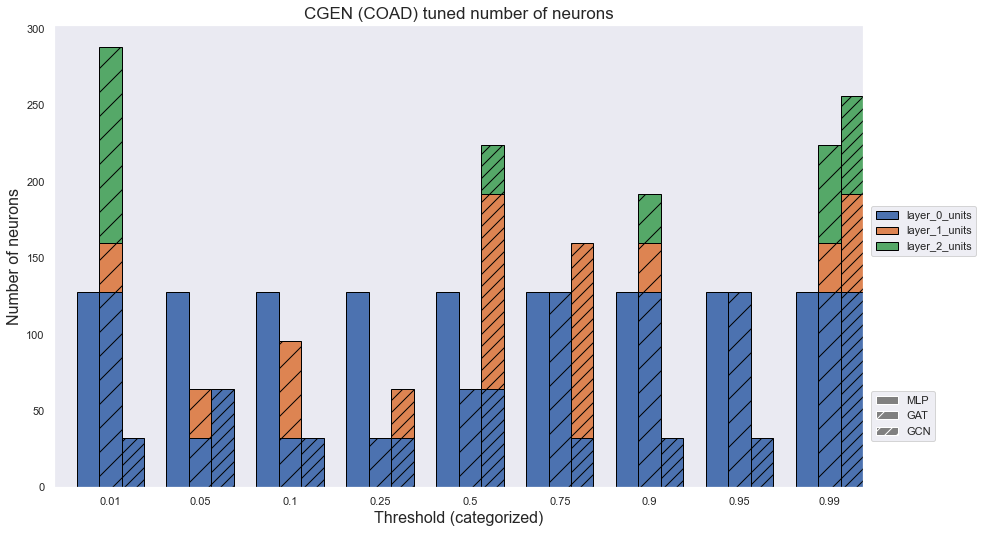

In [63]:
# Method from <https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas>
def plot_clustered_stacked(dfall, labels=None, title="multiple stacked bar plot",  H="/", xlabel=None, ylabel=None, **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
        labels is a list of the names of the dataframe, used for the legend
        title is a string for the title of the plot
        H is the hatch used for identification of the different dataframe"""
    
    sns.set_style("darkgrid")
    
    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      edgecolor='black', linewidth=1, 
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title, fontsize=17)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1]) 
    axe.add_artist(l1)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    return axe


ax = plot_clustered_stacked(
    [df_mlp_coad, df_gat_coad_cgen, df_gcn_coad_cgen],
    ["MLP", "GAT", "GCN"],
    title="CGEN (COAD) tuned number of neurons",
    xlabel="Threshold (categorized)",
    ylabel="Number of neurons")
fig = ax.figure

fig.set_size_inches(14.5, 8.5)
fig.savefig('stacked.pdf', bbox_inches='tight', dpi=100)

Text(0.5, 1.0, 'GAT CGEN (COAD)')

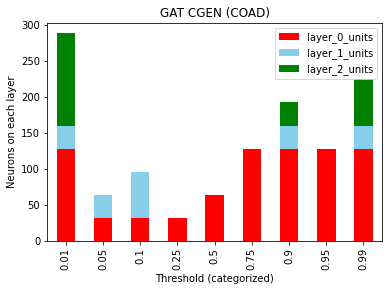

In [24]:
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
 
# labels for x & y axis
plt.xlabel('Threshold (categorized)')
plt.ylabel('Neurons on each layer')
 
# title of plot
plt.title('GAT CGEN (COAD)')